<a href="https://colab.research.google.com/github/rajatt0727/CUSTOMER_SENTIMENT_ANALYSIS/blob/main/SUPPLY_CHAIN_ANALYSIS_RT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'supply-chain-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3169086%2F5490896%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240520%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240520T120042Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8f17859c907ce2adafbf30746cdb3e9f0dc82c35fc1b34b100a604070ea5dc3b4c7f2f04629eb1a894dbb2205cd763614123af496ec661ef07682d94fe4df0bc5fc9fc19b39b3b0d5a261540d1f4264fa56e914c889ea7c1a5edb04d992700905e3cba69958c991f808259a57fa774eef21b4c380344fc32a8e1b03544ec6f66e362f6dd552a37d74e595eea3f2d5c7d6d26a456a14458b8933d9f21dfac441fdc0ac86ad1a71ee3c3cc8f4a0620e184632bd739e9fa31a17dd2e94534e6eef045c80f94dee138df735db529d8058d016deed7b4ab32ee7d58deb2b2ffebf557ad237ab0f0fdd5c2bdf48fe9c447ddd8f85ffcf22c4c0f430c5bdf710f7180a5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 9340 bytes downloaded
Downloaded and uncompressed: supply-chain-analysis
Data source import complete.


In [2]:
import pandas as pd

# Predefined sample structures from previously analyzed data
# Modify with the actual data structure
df_products = pd.DataFrame({
    "SKU": ["SKU85", "SKU86", "SKU87", "SKU88", "SKU89", "SKU90", "SKU91", "SKU92", "SKU93", "SKU94", "SKU95", "SKU96", "SKU97", "SKU98", "SKU99"],
    "Category": ["Cosmetics", "Skincare", "Haircare", "Cosmetics", "Cosmetics", "Skincare", "Cosmetics", "Cosmetics", "Haircare", "Cosmetics", "Haircare", "Cosmetics", "Haircare", "Skincare", "Haircare"],
    "Stock Levels": [76.96, 19.99, 80.41, 75.27, 97.76, 13.88, 62.11, 47.71, 69.29, 3.03, 77.90, 24.42, 3.52, 19.75, 68.51],
    "Lead Times": [83, 18, 24, 58, 10, 56, 90, 44, 88, 97, 65, 29, 56, 43, 17],
    "Order Quantities": [25, 223, 79, 737, 134, 320, 916, 276, 114, 987, 672, 324, 62, 913, 627],
    "Shipping Times": [8684.61, 1229.59, 5133.84, 9444.74, 5924.68, 9592.63, 1935.20, 2100.12, 4531.40, 7888.35, 7386.36, 7698.42, 4370.91, 8525.95, 9185.18]
})

df_suppliers = pd.DataFrame({
    "Supplier Name": ["Supplier 1", "Supplier 3", "Supplier 4", "Supplier 2", "Supplier 5"],
    "Location": ["Mumbai", "Mumbai", "Bangalore", "Chennai", "Kolkata"],
    "Lead Times": [12, 29, 22, 29, 19],
    "Production Volumes": [971, 215, 564, 963, 830],
    "Shipping Costs": [8.05, 2.95, 2.34, 7.16, 8.67]
})

df_customers = pd.DataFrame({
    "Gender": ["Non-binary", "Female", "Unknown", "Male"],
    "Stock Levels": [58, 53, 1, 80],
    "Order Quantities": [96, 37, 88, 48],
    "Shipping Times": [4, 2, 2, 9],
    "Shipping Carriers": ["Carrier B", "Carrier A", "Carrier B", "Carrier A"]
})

In [3]:
# Basic info to identify data types and missing values
print(df_products.info())
print(df_suppliers.info())
print(df_customers.info())

# Handling missing values if any (For demonstration assuming no missing values)
# df.fillna(method='ffill', inplace=True)  # Example method: Forward fill

# Removing duplicates if any
df_products.drop_duplicates(inplace=True)
df_suppliers.drop_duplicates(inplace=True)
df_customers.drop_duplicates(inplace=True)

# Ensuring proper data types
df_products['Stock Levels'] = df_products['Stock Levels'].astype(float)
df_suppliers['Production Volumes'] = df_suppliers['Production Volumes'].astype(int)
df_customers['Order Quantities'] = df_customers['Order Quantities'].astype(int)

# Correcting inconsistent values (if any)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKU               15 non-null     object 
 1   Category          15 non-null     object 
 2   Stock Levels      15 non-null     float64
 3   Lead Times        15 non-null     int64  
 4   Order Quantities  15 non-null     int64  
 5   Shipping Times    15 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 848.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Supplier Name       5 non-null      object 
 1   Location            5 non-null      object 
 2   Lead Times          5 non-null      int64  
 3   Production Volumes  5 non-null      int64  
 4   Shipping Costs      5 non-null      float64
dtypes:

In [4]:
# Descriptive statistics
print(df_products.describe())
print(df_suppliers.describe())
print(df_customers.describe())

       Stock Levels  Lead Times  Order Quantities  Shipping Times
count     15.000000   15.000000         15.000000       15.000000
mean      49.367333   51.866667        427.266667     6242.132000
std       32.017240   28.742370        345.508624     2879.165586
min        3.030000   10.000000         25.000000     1229.590000
25%       19.870000   26.500000        124.000000     4451.155000
50%       62.110000   56.000000        320.000000     7386.360000
75%       76.115000   74.000000        704.500000     8605.280000
max       97.760000   97.000000        987.000000     9592.630000
       Lead Times  Production Volumes  Shipping Costs
count    5.000000            5.000000        5.000000
mean    22.200000          708.600000        5.834000
std      7.190271          321.271381        2.968052
min     12.000000          215.000000        2.340000
25%     19.000000          564.000000        2.950000
50%     22.000000          830.000000        7.160000
75%     29.000000          9

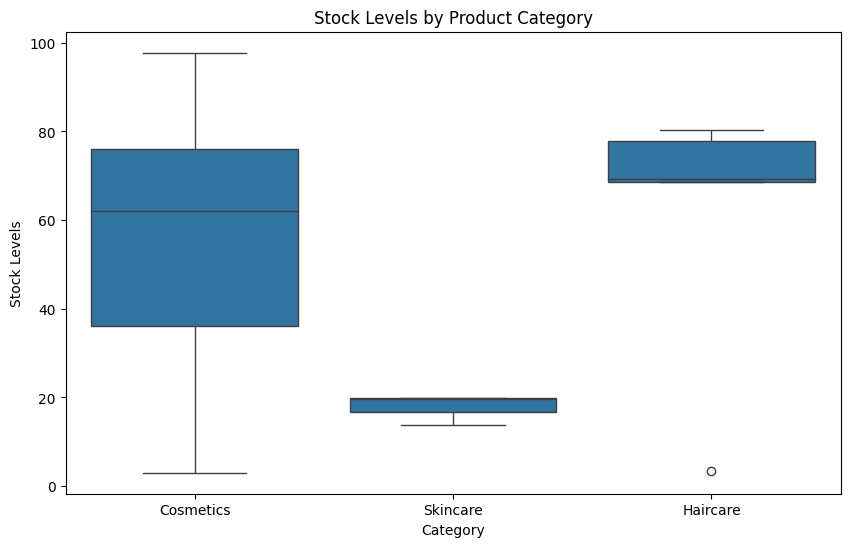

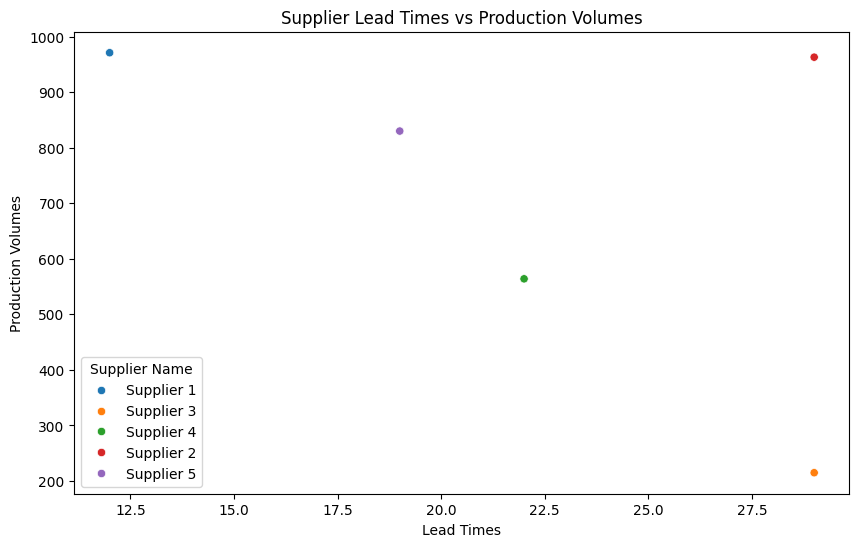

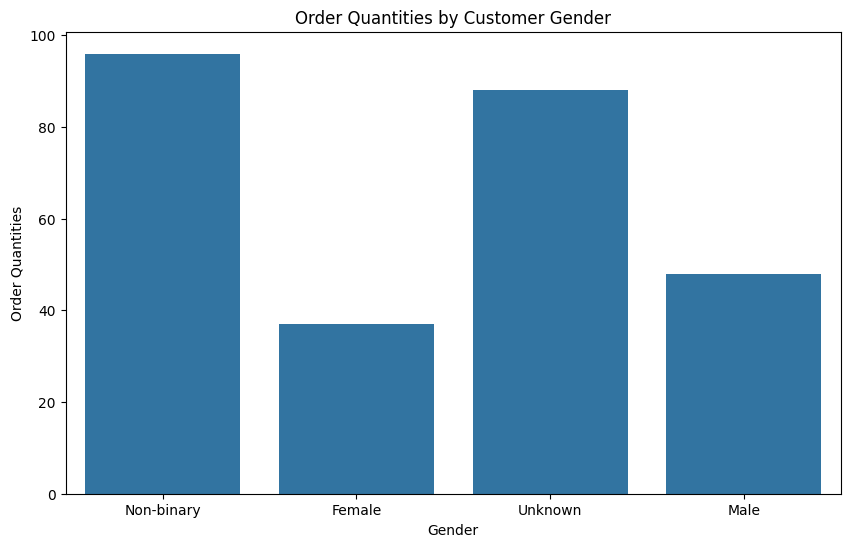

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stock Levels by Product Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Stock Levels', data=df_products)
plt.title('Stock Levels by Product Category')
plt.show()

# Supplier Lead Times vs Production Volumes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lead Times', y='Production Volumes', hue='Supplier Name', data=df_suppliers)
plt.title('Supplier Lead Times vs Production Volumes')
plt.show()

# Customer Order Quantities by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Order Quantities', data=df_customers)
plt.title('Order Quantities by Customer Gender')
plt.show()

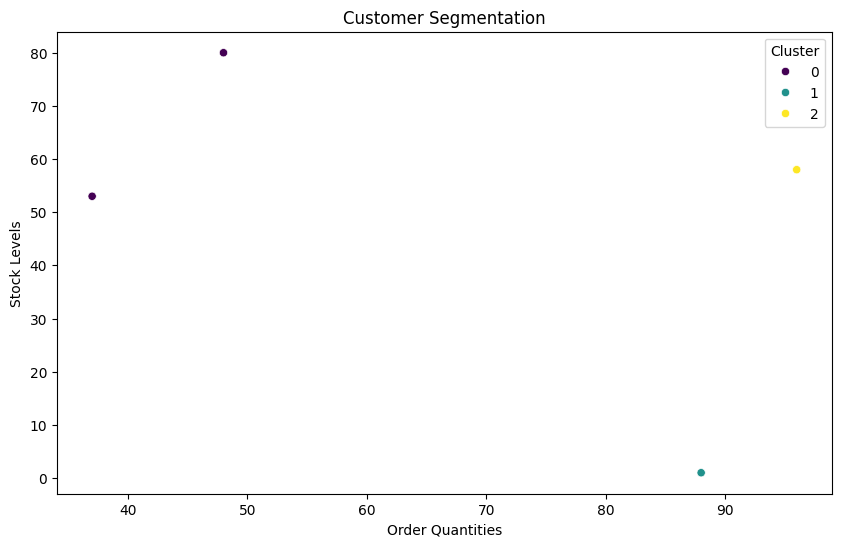

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Choosing features for clustering
cluster_data = df_customers[['Stock Levels', 'Order Quantities', 'Shipping Times']]

# K-Means Clustering with explicit n_init parameter
kmeans = KMeans(n_clusters=3, n_init=10)
df_customers['Cluster'] = kmeans.fit_predict(cluster_data)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Quantities', y='Stock Levels', hue='Cluster', data=df_customers, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Order Quantities')
plt.ylabel('Stock Levels')
plt.show()

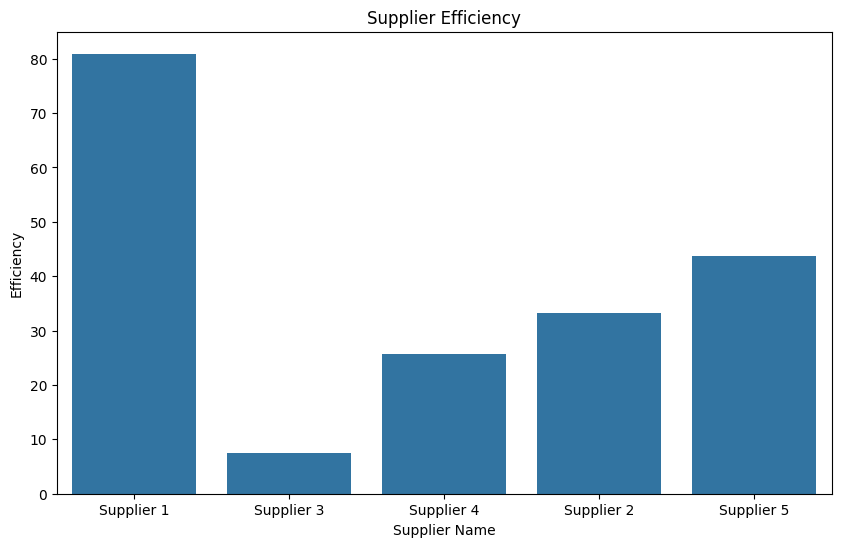

In [7]:
# Calculating efficiency as production volume divided by lead time
df_suppliers['Efficiency'] = df_suppliers['Production Volumes'] / df_suppliers['Lead Times']

# Visualizing Efficiency by Supplier
plt.figure(figsize=(10, 6))
sns.barplot(x='Supplier Name', y='Efficiency', data=df_suppliers)
plt.title('Supplier Efficiency')
plt.show()

Mean Squared Error: 3263.2446279978103


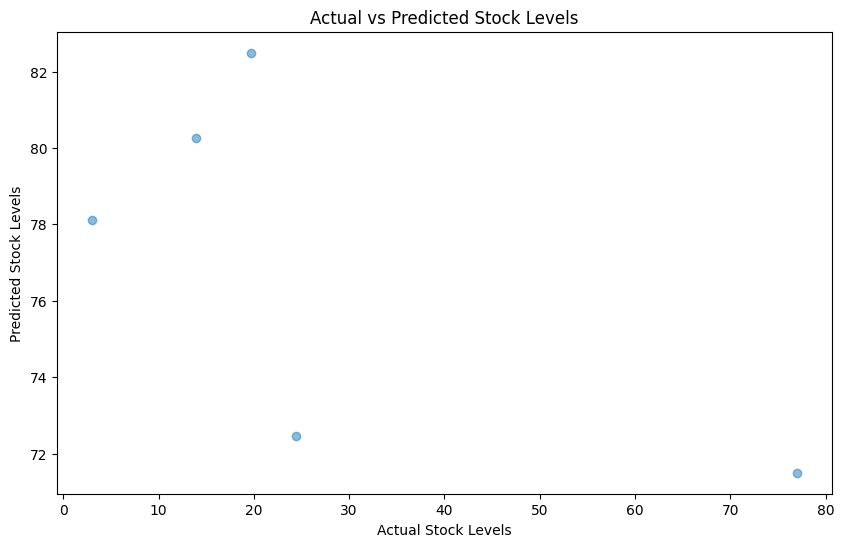

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target - for demonstration assuming linear relationship
X = df_products[['Lead Times', 'Order Quantities', 'Shipping Times']]
y = df_products['Stock Levels']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Stock Levels')
plt.ylabel('Predicted Stock Levels')
plt.title('Actual vs Predicted Stock Levels')
plt.show()